# 生成模拟数据

In [298]:
import os
path = '/project'
txt_file_name = os.path.join(path,'data','alpha_words.txt')
fonts_path = os.path.join(path,'data' ,'fonts_hw')
output_path = os.path.join(path,'data','images')
b_image_path = os.path.join(path,'data', 'background')
img_height = 32
img_width = 100
total_number = 100000
image_number = 100000
# alpha = 'ABCDEFGHIJK'
# alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# alpha = '0123456789+-÷×=)(＋－（）＝'
# alpha = '0123456789.'
alpha = '√×'
# alpha = 'BP'

In [293]:
# 生成字符
import lib.gen_image as gen
import importlib
importlib.reload(gen)

gen.gen_words(txt_file_name, alpha,min_number=0, max_number=1, total=total_number)
print('over')


over


In [299]:
# 生成训练图片
import lib.gen_image as gen
import os
import numpy as np
import random
import importlib
import shutil
import cv2
import json
importlib.reload(gen)

# 清空目录
shutil.rmtree(output_path)  
os.mkdir(output_path) 

# 字体
all_fonts = []
all_fonts_name = []
for root, dirs, files in os.walk(fonts_path):
    for file in files:
        if file.endswith(".ttf"):
            all_fonts.append(os.path.join(root, file))
            all_fonts_name.append(file[:-4])
            
with open(txt_file_name) as f:
    text_lines = f.readlines()
text_lines = [t.strip() for t in text_lines]
text_lines = [t for t in text_lines if len(t) > 0]

bg_file_lists = [os.path.join(b_image_path, x) for x in os.listdir(b_image_path)]
# print(bg_file_lists)
text_set = [[32, 100, [20,24]],[64,200,[30,28]],[48,150,[26,24]], [32,100,[22,20]]]

number_of_examples = image_number



image_list = []
output_data =[]
print('begin ....')
for i, txt in enumerate(random.sample(text_lines, number_of_examples)):
    if i%50000 == 0:
        print(i)    
    select_font_idx = np.random.randint(len(all_fonts))
    img_height, img_width, font_size_list = text_set[np.random.randint(len(text_set))]
    font_size = font_size_list[np.random.randint(len(font_size_list))]
    image = gen.make_image(test_str=txt, fonttype=all_fonts[select_font_idx], 
                         fontsize=font_size,target_width=img_width, target_height=img_height, 
                         back_ground_img_list=bg_file_lists, 
                         need_include=True)
#     print('image size -->', image.shape)
    img_path = os.path.join(output_path, str(i)+'_'+all_fonts_name[select_font_idx] + ".png")
#     image_list.append(image)
    cv2.imwrite(img_path, image)    
    txt = txt.replace('＋','+')
    txt = txt.replace('－','-')
    txt = txt.replace('（','(')
    txt = txt.replace('）',')')
    txt = txt.replace('＝','=')
#     print('txt -->', txt)
    output_data.append({
        "image_path": "{}_{}.png".format(str(i), all_fonts_name[select_font_idx]),
        "gt": txt.lower()
    })    
            
train_cnt = int(number_of_examples * 1.0)
val_cnt = number_of_examples - train_cnt
with open(os.path.join(path,'data', 'training.json'), 'w') as f:
    json.dump(output_data[:train_cnt], f)

with open(os.path.join(path,'data', 'validation.json'), 'w') as f:
    json.dump(output_data[train_cnt:], f)

print('over')


begin ....
0
50000
over


['50552_ChineseHWA.png', '23594_simsun.png', '4200_Lxgzxk.png', '64447_Lxgzxk.png', '99920_Hyfyfy.png', '73635_ChineseHWA.png', '50063_simple.png', '58946_simple.png', '35971_simple.png', '63616_Lxgzxk.png']


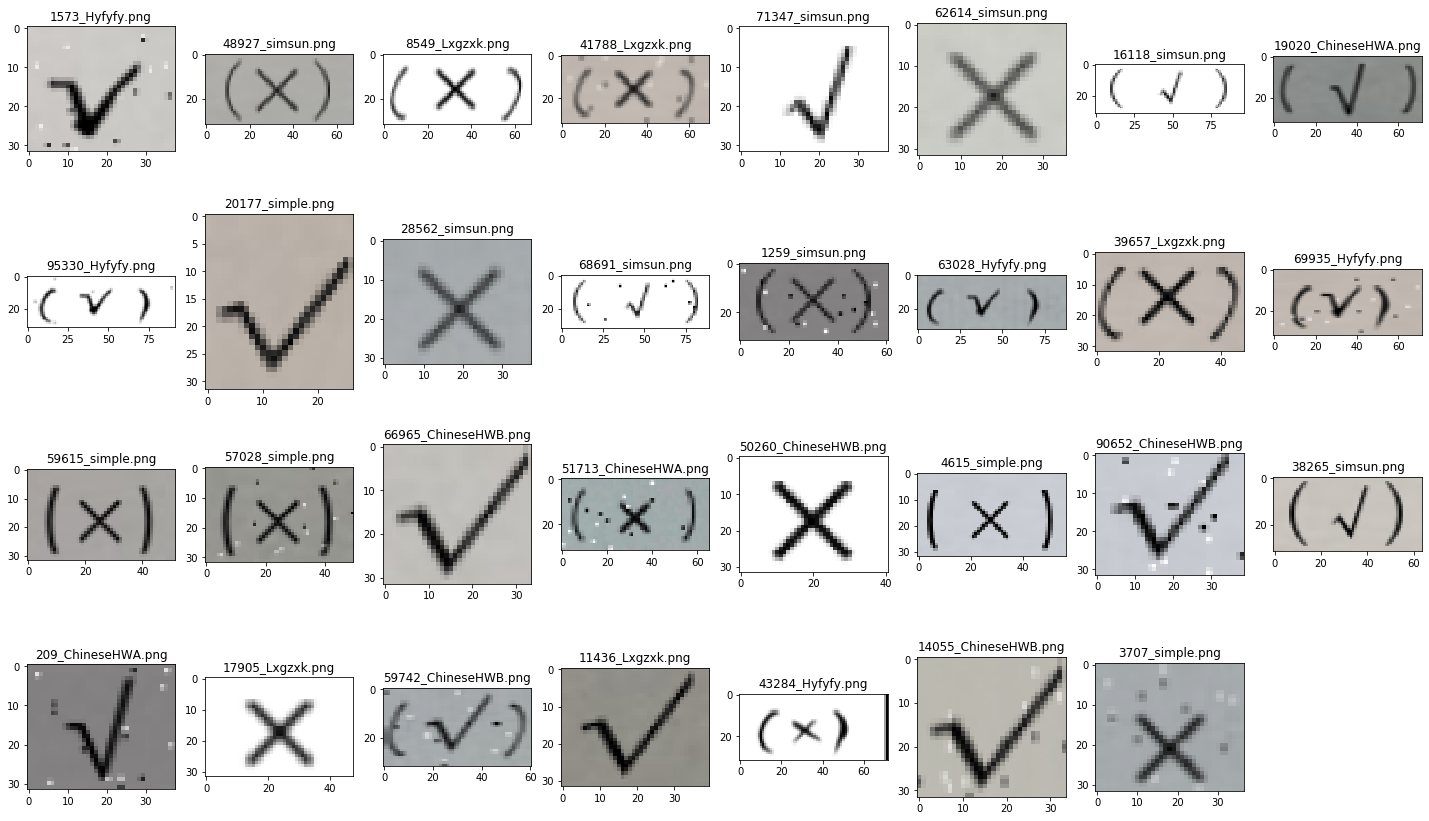

In [301]:
# 显示生成的图片
import torch
from PIL import Image
from torch.autograd import Variable
import lib.dataset as dataset
import importlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import lib.utils as utils
import os
plt.rcParams['figure.figsize'] = 25, 15


images_path = os.path.join(path,'data', 'images')
images_files = []
images_files_name = []
for root, dirs, files in os.walk(images_path):
    for file in files:
        images_files.append(os.path.join(root,file ))
        images_files_name.append(file)
print(images_files_name[0:10])

plt.figure()
for i in range(1,32):
    select_number = np.random.randint(image_number)
    image = Image.open(images_files[select_number])
    
    plt.subplot(4,8,i)
    plt.title(images_files_name[select_number])
    plt.imshow(image,'brg')
# plt.imshow(image,'brg')
plt.show()

In [302]:
# 生成训练库
import json
from lib.gen_dataset import createDataset
import os
img_path = os.path.join(path,'data','images')
train_file = os.path.join(path, 'data','training.json') 
valid_file = os.path.join(path, 'data','validation.json') 
with open(train_file,'r') as f:
    train_data = json.load(f)
    
imgLabelLists = []
for item in train_data:
    imgLabelLists.append((os.path.join(path,'data','images',item['image_path']) ,str(item['gt'])))

random.shuffle(imgLabelLists)
train_lmdb_path = os.path.join(path,'data','lmdb')   # 训练数据
trainImgPaths = [x[0] for x in imgLabelLists]
trainTxtLists = [x[1] for x in imgLabelLists]
createDataset(train_lmdb_path, trainImgPaths, trainTxtLists, lexiconList=None, checkValid=True)
    

samples length -- > 100000
Written 1000 / 100000
Written 2000 / 100000
Written 3000 / 100000
Written 4000 / 100000
Written 5000 / 100000
Written 6000 / 100000
Written 7000 / 100000
Written 8000 / 100000
Written 9000 / 100000
Written 10000 / 100000
Written 11000 / 100000
Written 12000 / 100000
Written 13000 / 100000
Written 14000 / 100000
Written 15000 / 100000
Written 16000 / 100000
Written 17000 / 100000
Written 18000 / 100000
Written 19000 / 100000
Written 20000 / 100000
Written 21000 / 100000
Written 22000 / 100000
Written 23000 / 100000
Written 24000 / 100000
Written 25000 / 100000
Written 26000 / 100000
Written 27000 / 100000
Written 28000 / 100000
Written 29000 / 100000
Written 30000 / 100000
Written 31000 / 100000
Written 32000 / 100000
Written 33000 / 100000
Written 34000 / 100000
Written 35000 / 100000
Written 36000 / 100000
Written 37000 / 100000
Written 38000 / 100000
Written 39000 / 100000
Written 40000 / 100000
Written 41000 / 100000
Written 42000 / 100000
Written 43000 / 

In [17]:
# traindata loader
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import lib.dataset as dataset
import lib.utils as utils
import time
import importlib
importlib.reload(dataset)
importlib.reload(utils)

batch_size = 100

train_dataset = dataset.lmdbDataset(root= os.path.join(path,'data','lmdb'))
# print('train data set length -->{}'.format(len(train_dataset)))
train_set, val_set = torch.utils.data.random_split(train_dataset,
                                                   [int(0.9*len(train_dataset)), 
                                                    int(0.1*len(train_dataset))])


train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size,
    shuffle=True,
    collate_fn=dataset.adjustCollate(imgH=32, keep_ratio=False))
#     

for step, values in enumerate(train_loader):
    images = Variable(values[0].type(torch.FloatTensor), requires_grad=False)
#     images = values[0]
    print('step -->', images.size(), '-->', len(images))
    break

print('over')


step --> torch.Size([90, 3, 32, 117]) --> 90
over


In [55]:
# image 统一长度
PADDING_CONSTANT = 255
assert len(set([b.shape[0] for b in image_list])) == 1
assert len(set([b.shape[2] for b in image_list])) == 1

dim0 = image_list[0].shape[0]
dim1 = max([b.shape[1] for b in image_list])
dim2 = image_list[0].shape[2]

image_list_new = np.full((len(image_list), dim0, dim1, dim2), PADDING_CONSTANT).astype(np.long)
print(len(image_list_new))
for idx, image in enumerate(image_list_new):
    image[:,:image_list[idx].shape[1],:] = image_list[idx]
    img_path = os.path.join(output_path, str(idx)+'_'+all_fonts_name[idx%len(all_fonts)] + ".png")
    cv2.imwrite(img_path, image)   
    

100
